#ASSIGNMENT-04
##Clustering the data and performing classification algorithms
1. Download the dataset: Dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.
∙ Univariate Analysis
∙ Bi- Variate Analysis
∙ Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding.
8. Scaling the data
9. Perform any of the clustering algorithms

10. Add the cluster data with the primary dataset
11. Split the data into dependent and independent
variables.
12. Split the data into training and testing
13. Build the Model
14. Train the Model
15. Test the Model
16. Measure the performance using Evaluation Metrics.

#Mounting Drive for dataset

* 01 Download the dataset: Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

###Downloading and Importing the Dataset
* 02.Loaded the dataset into the tool.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATASET/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#03.Perform Below Visualizations.  


1.   Univariate Analysis 
2.   Bi- Variate Analysis     
3.   Multi-Variate Analysis






##3.1 Univariate Analysis

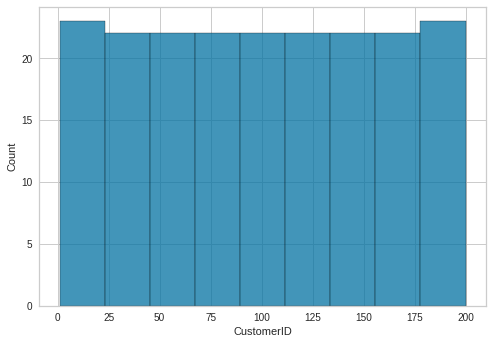

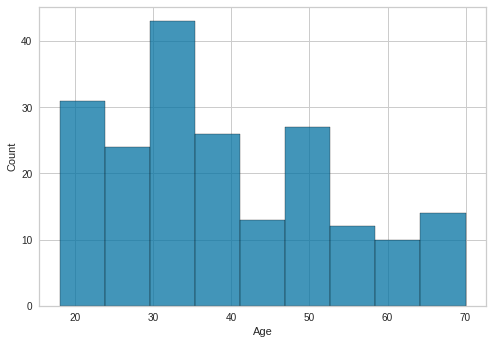

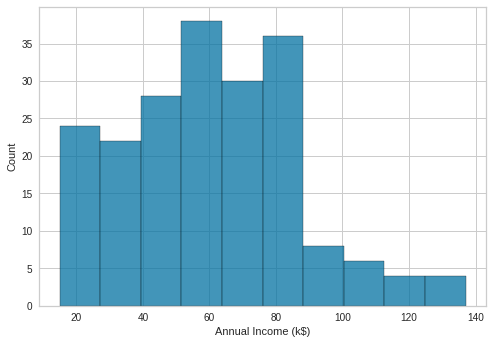

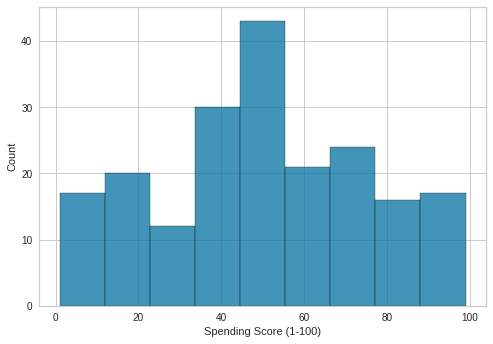

In [ ]:
for col in data.columns:
  if(data.dtypes[col]=='int64' or data.dtypes[col]=='float64'):
    sns.histplot(x=data[col]).set( xlabel=col)
    plt.show()

##3.2 Bi- Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


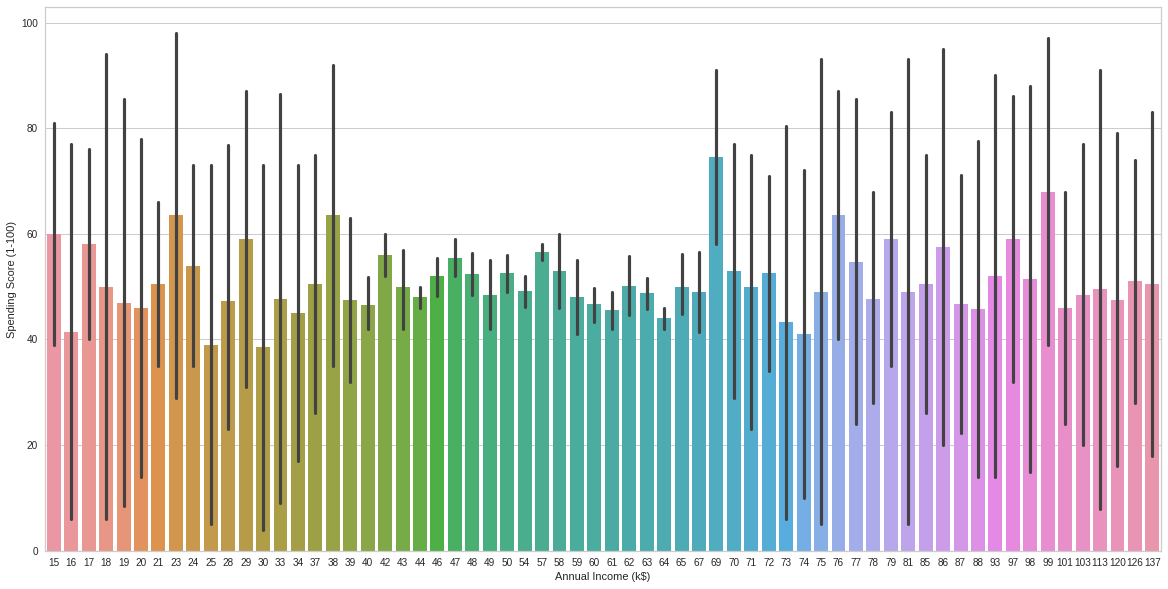

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data["Annual Income (k$)"],data["Spending Score (1-100)"])


##3.3 Multi-Variate Analysis

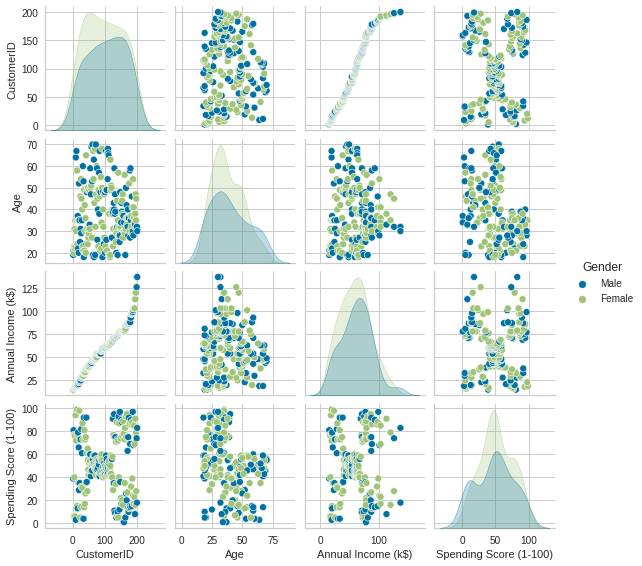

In [ ]:
sns.pairplot(data, hue='Gender',height=2)

In [ ]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


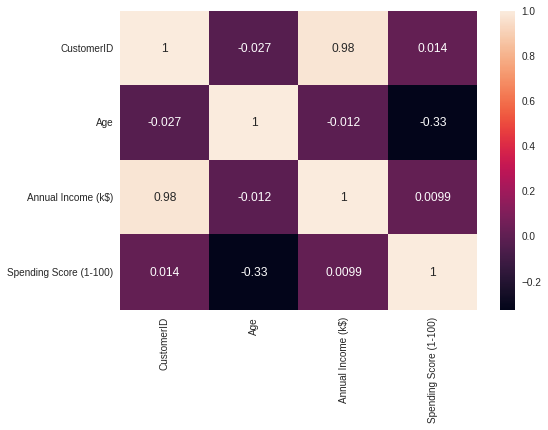

In [ ]:
sns.heatmap(data.corr(),annot=True)

#04.Perform descriptive statistics on the dataset.

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#05.Check for Missing values and deal with them.

###Since there is no null values this task is skipped

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#06.Find the outliers and replace them outliers

###Outliers are found using the univariate BOXPLOT from Task 3

In [ ]:
for i in data:
    if data[i].dtype=='int64' or data[i].dtypes=='float64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

After Removing Outliers,Boxplot be like

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


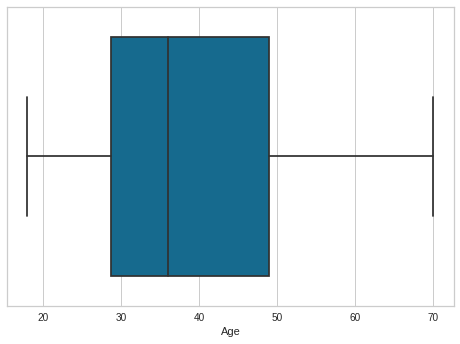

In [ ]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


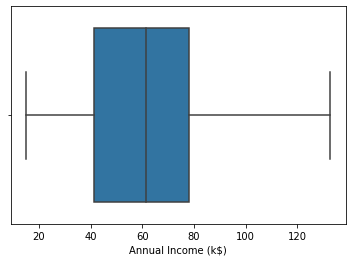

In [ ]:
sns.boxplot(data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


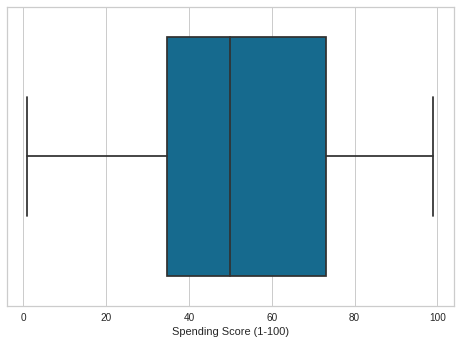

In [ ]:
sns.boxplot(data['Spending Score (1-100)'])

#07.Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])

In [ ]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,1,19.0,15.0,39.0
1,2.0,1,21.0,15.0,81.0
2,3.0,0,20.0,16.0,6.0
3,4.0,0,23.0,16.0,77.0
4,5.0,0,31.0,17.0,40.0
5,6.0,0,22.0,17.0,76.0
6,7.0,0,35.0,18.0,6.0
7,8.0,0,23.0,18.0,94.0
8,9.0,1,64.0,19.0,3.0
9,10.0,0,30.0,19.0,72.0


#08.Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
df=StandardScaler()
data1=df.fit_transform(data)

In [ ]:
data1

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.74542941, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.74542941,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70708307, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70708307,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66873673, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66873673,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.6303904 , -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.6303904 ,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.59204406, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.59204406,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.59204406, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.59204406,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.55369772, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

#09.Perform any of the clustering algorithms

In [ ]:
from sklearn.cluster import KMeans
data.drop('CustomerID',axis=1,inplace=True)
km = KMeans(n_clusters=3, random_state=0)
data['Group or Cluster'] = km.fit_predict(data)

In [ ]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Group or Cluster
0,1,19.0,15.00,39.0,2
1,1,21.0,15.00,81.0,2
2,0,20.0,16.00,6.0,2
3,0,23.0,16.00,77.0,2
4,0,31.0,17.00,40.0,2
...,...,...,...,...,...
195,0,35.0,120.00,79.0,1
196,0,45.0,126.00,28.0,0
197,1,32.0,126.00,74.0,1
198,1,32.0,132.75,18.0,0


In [ ]:
data['Group or Cluster'].value_counts()

2    123
1     39
0     38
Name: Group or Cluster, dtype: int64

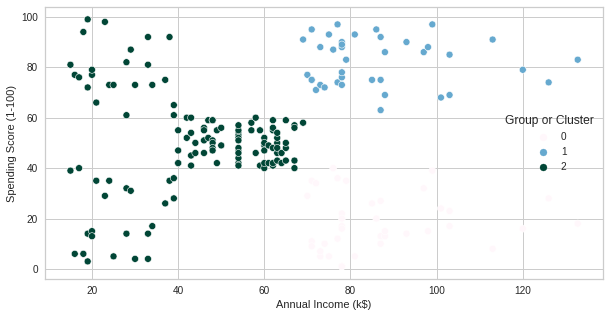

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=data['Annual Income (k$)'],
                y=data['Spending Score (1-100)'],
                hue=data['Group or Cluster'],
                palette='PuBuGn')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
score = silhouette_score(data, 
                         km.labels_, 
                         metric='euclidean')
score

0.3842057644019546

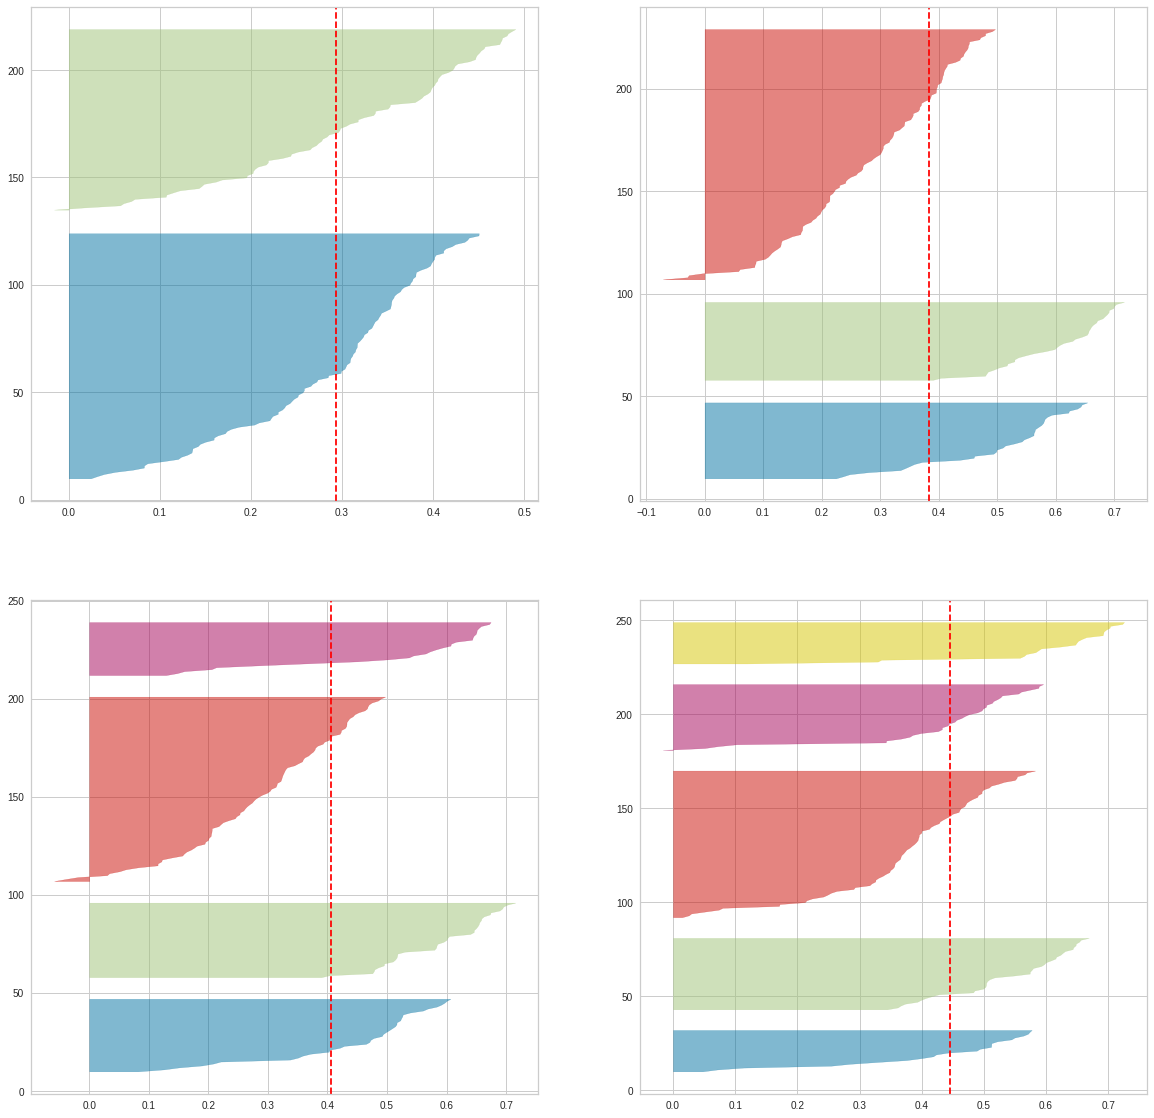

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(20,20))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=100, 
                random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, 
                                      colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(data)

#10.Add the Cluster data with Primary dataset

clustering data's are added in the  primary dataset and here gender is converted into numeric in Categorical columns for further process

In [ ]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Group or Cluster
0,1,19.0,15.00,39.0,2
1,1,21.0,15.00,81.0,2
2,0,20.0,16.00,6.0,2
3,0,23.0,16.00,77.0,2
4,0,31.0,17.00,40.0,2
...,...,...,...,...,...
195,0,35.0,120.00,79.0,1
196,0,45.0,126.00,28.0,0
197,1,32.0,126.00,74.0,1
198,1,32.0,132.75,18.0,0


#11.Split the data into dependent and independent variables.

In [ ]:
x=data.iloc[:,:-1]
x.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


In [ ]:
y=data.iloc[:,-1]
y

0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    0
197    1
198    0
199    1
Name: Group or Cluster, Length: 200, dtype: int32

#12.Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0,63.0,65.0,43.0
67,0,68.0,48.0,48.0
78,0,23.0,54.0,52.0
42,1,48.0,39.0,36.0
17,1,20.0,21.0,66.0
...,...,...,...,...
133,0,31.0,72.0,71.0
137,1,32.0,73.0,73.0
72,0,60.0,50.0,49.0
140,0,57.0,75.0,5.0


In [ ]:
x_train.shape

(140, 4)

In [ ]:
x_test

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0,27.0,46.00,51.0
40,0,65.0,38.00,35.0
34,0,49.0,33.00,14.0
102,1,67.0,62.00,59.0
184,0,41.0,99.00,39.0
198,1,32.0,132.75,18.0
95,1,24.0,60.00,52.0
4,0,31.0,17.00,40.0
29,0,23.0,29.00,87.0
168,0,36.0,87.00,27.0


In [ ]:
x_test.shape

(60, 4)

In [ ]:
y_train

116    2
67     2
78     2
42     2
17     2
      ..
133    1
137    1
72     2
140    0
37     2
Name: Group or Cluster, Length: 140, dtype: int32

In [ ]:
y_train.shape

(140,)

In [ ]:
y_test

58     2
40     2
34     2
102    2
184    0
198    0
95     2
4      2
29     2
168    0
171    1
18     2
11     2
89     2
110    2
118    2
159    1
35     2
136    0
59     2
51     2
16     2
44     2
94     2
31     2
162    0
38     2
28     2
193    1
27     2
47     2
165    1
194    0
177    1
176    0
97     2
174    0
73     2
69     2
172    0
108    2
107    2
189    1
14     2
56     2
19     2
114    2
39     2
185    1
124    0
98     2
123    1
119    2
53     2
33     2
179    1
181    1
106    2
199    1
138    0
Name: Group or Cluster, dtype: int32

In [ ]:
y_test.shape

(60,)

#Various Classification Algorithms Employed

#I. Logistic Regression

#13.Build the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

#14 & 15.Training and Testing The Model

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred1=model.predict(x_test)
pred1

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0], dtype=int32)

In [ ]:
y_test

58     2
40     2
34     2
102    2
184    0
198    0
95     2
4      2
29     2
168    0
171    1
18     2
11     2
89     2
110    2
118    2
159    1
35     2
136    0
59     2
51     2
16     2
44     2
94     2
31     2
162    0
38     2
28     2
193    1
27     2
47     2
165    1
194    0
177    1
176    0
97     2
174    0
73     2
69     2
172    0
108    2
107    2
189    1
14     2
56     2
19     2
114    2
39     2
185    1
124    0
98     2
123    1
119    2
53     2
33     2
179    1
181    1
106    2
199    1
138    0
Name: Group or Cluster, dtype: int32

In [ ]:
train_pred=model.predict(x_train)
train_pred

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 0, 2], dtype=int32)

#16.Evaluation of The Algorithm Performance using Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,pred1)

1.0

In [ ]:
accuracy_score(y_train,train_pred)

1.0

In [ ]:
confusion_matrix(y_test,pred1)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 38]])

In [ ]:
pd.crosstab(y_test,pred1)

col_0,0,1,2
Group or Cluster,,,
0,11,0,0
1,0,11,0
2,0,0,38


###Classification Report

In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        38

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



The Logistic Regression Algorithm has a 100% accuracy in both Training and Testing in predicting the Target Customers.

#II.Support Vector Machine algorithm

#13.Building The Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier=SVC(kernel='linear',random_state=0)

#14 & 15 . Training and Testing The Model

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
pred2=classifier.predict(x_test)
pred2

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0], dtype=int32)

In [ ]:
train_pred1=classifier.predict(x_train)
train_pred1

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 0, 2], dtype=int32)

#16.Evaluation of The Algorithm Performance using Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,pred2)

1.0

In [ ]:
accuracy_score(y_train,train_pred1)

1.0

In [ ]:
confusion_matrix(y_test,pred2)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 38]])

In [ ]:
pd.crosstab(y_test,pred2)

col_0,0,1,2
Group or Cluster,,,
0,11,0,0
1,0,11,0
2,0,0,38


###Classification Report

In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        38

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



The Support Vector Machine Algorithm also has the same 100 percent accuracy in both Training and Testing in predicting the Target customers.

#III. Random Forest Classifier

#13.Building The Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=10,criterion="entropy")

#14 & 15.Training and Testing The Model

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
pred3=rf.predict(x_test)
pred3

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0], dtype=int32)

In [ ]:
train_pred2=rf.predict(x_train)
train_pred2

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 0, 2], dtype=int32)

#16.Evaluation of The Algorithm Performance using Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,pred3)

1.0

In [ ]:
accuracy_score(y_train,train_pred2)

1.0

In [ ]:
confusion_matrix(y_test,pred3)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 38]])

In [ ]:
pd.crosstab(y_test,pred3)

col_0,0,1,2
Group or Cluster,,,
0,11,0,0
1,0,11,0
2,0,0,38


Classification Report

In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        38

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



The Random Forest Classifier Algorithm has an accuracy of 100% in the Training and  Testing in predicting the Target Customers.

#IV.Naive Bayes Classifier Algorithm

#13.Building The Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#14 & 15.Training and Testing The Model

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
pred4=nb.predict(x_test)
pred4

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0])

In [ ]:
train_pred3=nb.predict(x_train)
train_pred3

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 0, 2])

#16.Evaluation of Algorithm Performance using Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,pred4)

0.9833333333333333

In [ ]:
accuracy_score(y_train,train_pred3)

0.9857142857142858

In [ ]:
confusion_matrix(y_test,pred4)

array([[10,  0,  1],
       [ 0, 11,  0],
       [ 0,  0, 38]])

In [ ]:
pd.crosstab(y_test,pred4)

col_0,0,1,2
Group or Cluster,,,
0,10,0,1
1,0,11,0
2,0,0,38


Classification Report

In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00        11
           2       0.97      1.00      0.99        38

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



The Naive Bayes Algorithm has a nearly similar accuracy in both training and testing of nearly 98%.



#V. K Nearest Neighbours Algorithm

#13.Building The Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

#14 & 15.Training and Testing the Model

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred5=knn.predict(x_test)
pred5

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0], dtype=int32)

In [ ]:
train_pred4=knn.predict(x_train)
train_pred4

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 0, 2], dtype=int32)

#16.Evaluation of the Algorithm Performance using Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,pred5)

1.0

In [ ]:
accuracy_score(y_train,train_pred4)

0.9785714285714285

In [ ]:
confusion_matrix(y_test,pred5)

array([[11,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 38]])

In [ ]:
pd.crosstab(y_test,pred5)

col_0,0,1,2
Group or Cluster,,,
0,11,0,0
1,0,11,0
2,0,0,38


Classification report

In [ ]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        38

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



The K Nearest Neighbor Classifier Algorithm has an accuracy of 100% in Testing and nearly 98% in Training in predicting the Target Customers.

#Hence Various Classification Algorithms are applied on Clustered Data which is added in the Primary Dataset.